## https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "creditcard.csv"

# Load the latest version
dataset = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mlg-ulb/creditcardfraud",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", dataset.head())

/tmp/ipython-input-3-3793606633.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  dataset = kagglehub.load_dataset(


First 5 records:    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26    

In [4]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
dataset.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [7]:
dataset.duplicated()


,0
0,False
1,False
2,False
3,False
4,False
...,...
284802,False
284803,False
284804,False
284805,False


In [8]:
dataset.drop_duplicates(inplace=True)

In [9]:
dataset.drop('Time', axis=1, inplace=True)

<Axes: ylabel='Amount'>

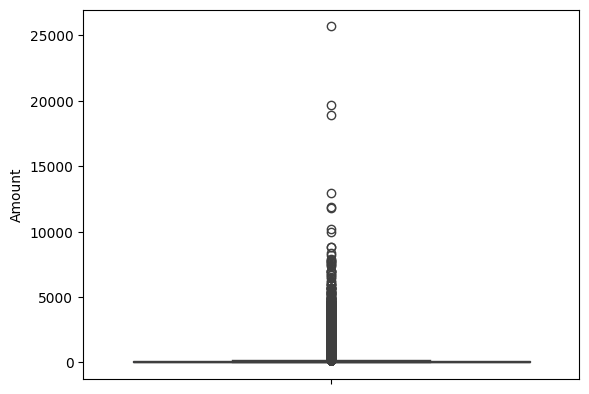

In [10]:
sns.boxplot(dataset['Amount'])

In [12]:
X = dataset.drop('Class', axis=1)
y = dataset['Class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [15]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)


print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.978152944493676
Test Accuracy: 0.977654550153904


In [17]:
class_report = classification_report(y_test, y_pred_test)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84984
           1       0.05      0.79      0.10       134

    accuracy                           0.98     85118
   macro avg       0.53      0.88      0.54     85118
weighted avg       1.00      0.98      0.99     85118



In [18]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X,y)

In [19]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X_train_smote, y_train_smote, test_size=0.3, random_state=42)

In [20]:
model2 = GaussianNB()
model2.fit(x_train2, y_train2)

GaussianNB()

In [21]:
y_pred_test2 = model2.predict(x_test2)

In [22]:
test_accuracy2 = accuracy_score(y_test2, y_pred_test2)

print('Test Accuracy:', test_accuracy2)

Test Accuracy: 0.9157291470532857


In [23]:
class_report2 = classification_report(y_test2, y_pred_test2)
print(class_report2)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     84880
           1       0.97      0.86      0.91     85072

    accuracy                           0.92    169952
   macro avg       0.92      0.92      0.92    169952
weighted avg       0.92      0.92      0.92    169952



In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train2, y_train2)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
y_pred_test3 = lr.predict(x_test2)

In [26]:
accuracy_testing3 = accuracy_score(y_test2, y_pred_test3)

print('Test Accuracy:', accuracy_testing3)

Test Accuracy: 0.9566112784786293


In [27]:
class_report3 =  classification_report(y_test2, y_pred_test3)
print(class_report3)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     84880
           1       0.98      0.93      0.96     85072

    accuracy                           0.96    169952
   macro avg       0.96      0.96      0.96    169952
weighted avg       0.96      0.96      0.96    169952

